In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

# import helper

import matplotlib.pyplot as plt

In [5]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


Extracting C:\Users\HP/.pytorch/MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to C:\Users\HP/.pytorch/MNIST_data/MNIST\raw




Extracting C:\Users\HP/.pytorch/MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\HP/.pytorch/MNIST_data/MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting C:\Users\HP/.pytorch/MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\HP/.pytorch/MNIST_data/MNIST\raw




Extracting C:\Users\HP/.pytorch/MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\HP/.pytorch/MNIST_data/MNIST\raw

Processing...


C:\Users\HP\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


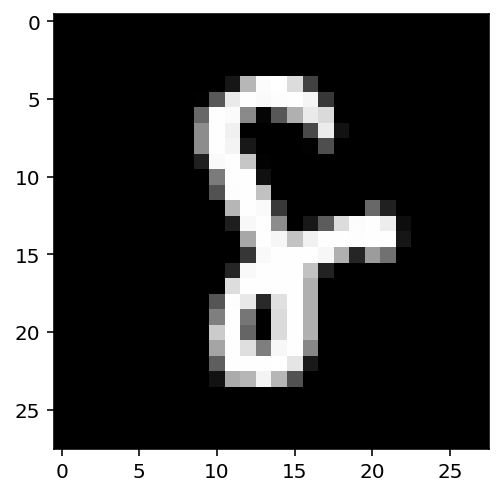

In [7]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [12]:
def activation(x):
    return 1/(1+torch.exp(-x))

def multi_layer_NW(inputUnits, hiddenUnits, outputUnits):
    torch.manual_seed(7)
    n_input = inputUnits
    n_hidden = hiddenUnits
    n_output = outputUnits
    
    W1 = torch.randn(n_input, n_hidden)
    W2 = torch.randn(n_hidden, n_output)
    
    B1 = torch.randn((1, n_hidden))
    B2 = torch.randn((1, n_output))
    
    return W1, W2, B1, B2


def calc_output(features,W1,W2,B1,B2):
    h = activation(torch.matmul(features,W1).add_(B1))
    output = activation(torch.matmul(h,W2).add_(B2))
    return output

features = torch.flatten(images,start_dim=1)
W1,W2,B1,B2 = multi_layer_NW(features.shape[1],256,10)

out = calc_output(features,W1,W2,B1,B2)

In [16]:
def softmax(x):
    ## TODO: Implement the softmax function here
    return (torch.exp(x) / torch.sum(torch.exp(x)))

# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([0.0141, 0.0147, 0.0169, 0.0155, 0.0140, 0.0165, 0.0152, 0.0165, 0.0145,
        0.0157, 0.0163, 0.0166, 0.0148, 0.0137, 0.0150, 0.0171, 0.0171, 0.0147,
        0.0166, 0.0161, 0.0199, 0.0139, 0.0156, 0.0157, 0.0156, 0.0168, 0.0144,
        0.0149, 0.0172, 0.0157, 0.0151, 0.0178, 0.0139, 0.0154, 0.0141, 0.0154,
        0.0150, 0.0144, 0.0165, 0.0155, 0.0165, 0.0152, 0.0137, 0.0150, 0.0162,
        0.0146, 0.0151, 0.0154, 0.0165, 0.0132, 0.0180, 0.0150, 0.0157, 0.0136,
        0.0166, 0.0159, 0.0166, 0.0182, 0.0166, 0.0142, 0.0147, 0.0185, 0.0149,
        0.0153])


# Building networks with PyTorch

In [17]:
from torch import nn

In [18]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [19]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

### Concise way of creating the network


In [22]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256,10)
        
    def forward(self,x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim = 1)
        
        return x

##### Creating a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the nn.ReLU module or F.relu function.

In [31]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim = 1)
        
        return x
        
        

In [32]:
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [33]:

print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0108, -0.0064,  0.0180,  ..., -0.0278,  0.0283, -0.0150],
        [ 0.0291,  0.0183,  0.0342,  ..., -0.0020,  0.0213,  0.0130],
        [-0.0093,  0.0075, -0.0322,  ...,  0.0134, -0.0202, -0.0192],
        ...,
        [ 0.0352, -0.0348, -0.0265,  ...,  0.0357,  0.0334, -0.0287],
        [-0.0336, -0.0091,  0.0264,  ...,  0.0061, -0.0121, -0.0265],
        [ 0.0086, -0.0050,  0.0048,  ...,  0.0030, -0.0192,  0.0269]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0217, -0.0288, -0.0096, -0.0354,  0.0053,  0.0124,  0.0284, -0.0118,
        -0.0292, -0.0308, -0.0319, -0.0209,  0.0240, -0.0110, -0.0122, -0.0269,
         0.0055,  0.0277,  0.0021,  0.0227,  0.0272,  0.0029,  0.0168, -0.0080,
         0.0085,  0.0199, -0.0241,  0.0007,  0.0068,  0.0188,  0.0105,  0.0320,
        -0.0327,  0.0204, -0.0081,  0.0114, -0.0029,  0.0004,  0.0228, -0.0137,
        -0.0342, -0.0162,  0.0245,  0.0011,  0.0273,  0.0011,  0.0314,  0.0140,
         0.0234

In [34]:
model.fc1.bias.data.fill_(0)
model.fc1.weight.data.normal_(std=0.01)
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 1.6653e-02, -1.3110e-02, -8.6029e-03,  ...,  1.7131e-03,
         -9.0008e-03,  6.2851e-03],
        [ 1.6517e-03, -1.2334e-02,  1.2620e-02,  ..., -6.7218e-03,
          9.6172e-03,  9.2312e-03],
        [-4.9155e-03, -7.0677e-03,  1.7903e-02,  ...,  1.1409e-02,
         -7.6191e-05, -8.3350e-03],
        ...,
        [-6.2382e-03, -4.2531e-03, -1.9434e-03,  ...,  7.1445e-03,
         -3.6215e-03, -2.0718e-02],
        [-1.3748e-02,  1.4426e-03, -1.1504e-02,  ...,  5.7599e-03,
          8.2837e-03,  2.3810e-02],
        [-2.5513e-02, -1.1169e-02, -1.4988e-02,  ..., -5.3088e-03,
         -2.1968e-02, -1.0001e-02]], requires_grad=True)
Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [40]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
images.resize_(64, 1, 784)
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]


#### Using nn.Sequential

In [42]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
# helper.view_classify(images[0].view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


passing in an OrderedDict to name the individual layers and operations, instead of using incremental integers.

In [43]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)